## Geometric Brownian Motion
$dS = \mu Sdt + \sigma SdW_t$<p>
$S(t)=S_0e^{(\mu -\frac{1}{2}\sigma^2) + \sigma W_t}$<p>
$S({t_{i+1}}) = S(t_i) exp(\mu - \frac{1}{2}\sigma^2) (t_{i+1} - t_i) + \sigma \sqrt{t_{i+1} - t_i} Z_{i+1}$

In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

plt.style.use('bmh')

In [2]:
ticker = 'MSFT'
data = yf.download(ticker, period='1y', interval='1d', auto_adjust=True, progress=False)
data['returns'] = np.log(data.Close / data.Close.shift(1))
data.dropna(inplace=True)
data 

,Open,High,Low,Close,Volume,returns
Date,,,,,,
2021-02-25,230.204877,232.694592,226.038815,227.139847,39542200,-0.023991
2021-02-26,229.659334,233.468304,227.685406,230.502472,37819200,0.014696
2021-03-01,233.994014,235.551336,231.266233,235.025620,25324000,0.019433
2021-03-02,235.095037,235.382702,231.563803,231.980408,22812500,-0.013042
2021-03-03,230.284229,231.692754,225.423811,225.721390,34029500,-0.027351
...,...,...,...,...,...,...
2022-02-16,298.369995,300.869995,293.679993,299.500000,29982100,-0.001168
2022-02-17,296.359985,296.799988,290.000000,290.730011,32461600,-0.029719
2022-02-18,293.049988,293.859985,286.309998,287.929993,34223200,-0.009678


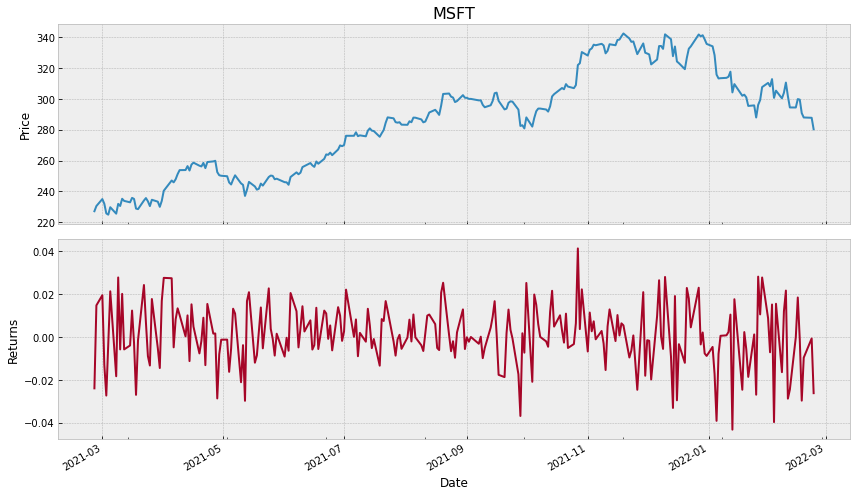

In [3]:
ax = data[['Close','returns']].plot(subplots=True, figsize=(12,7), legend=False)
ax[0].set_ylabel('Price')
ax[0].set_title(ticker, fontsize=16)
ax[1].set_ylabel('Returns')

plt.tight_layout()
plt.show()

In [4]:
test_len = int(len(data)*0.1)
train = data.iloc[:-test_len, :]
test = data.iloc[-test_len:, :]

In [5]:
T = test_len
N = test_len
S_0 = train.Close[-1]
num_sim = 1000
mu = train.returns.mean()
sigma = train.returns.std()

dt = T/N
dW = np.random.normal(scale=np.sqrt(dt), size=(num_sim, N))
W = dW.cumsum(axis=1)
time_steps = np.linspace(dt, T, N)
S_t = S_0 * np.exp((mu - 0.5 * (sigma**2)) * time_steps + sigma * W)
S_t = np.insert(S_t, 0, S_0, axis=1)

In [6]:
actual = data.Close.iloc[-(test_len+1):]
simulations = pd.DataFrame(S_t.transpose(), index=actual.index)
simulations_mean = simulations.mean(axis=1)

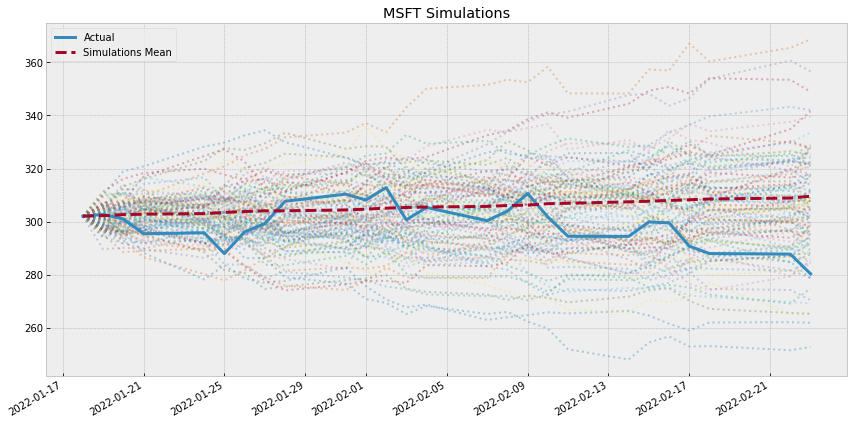

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
simulations.iloc[:, :100].plot(ax=ax, legend=False, alpha=0.3, linestyle=':')
actual.plot(ax=ax, linewidth=3, label='Actual', legend=True)
simulations_mean.plot(ax=ax, label='Simulations Mean', legend=True, linestyle='--', linewidth=3)
ax.set_title(f"{ticker} Simulations")
ax.set_xlabel('')

plt.tight_layout()
plt.show()